## For Numerical data: 

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [7]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


- ```Filling missing value with from random column.```

In [12]:
X_train['Age_imputed'].loc[X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(
    X_train['Age_imputed'].isnull().sum(), replace=True
).values

X_test['Age_imputed'].loc[X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(
    X_test['Age_imputed'].isnull().sum(), replace=True
).values



/var/folders/k_/w_0ddy056_b8jdbw_w07q8lh0000gn/T/ipykernel_30856/3989873673.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'].loc[X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(
/var/folders/k_/w_0

In [13]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 31.  , 45.  ,  4.  , 26.  , 36.  , 36.  , 25.  ,  4.  ,
       25.  , 17.  , 39.  , 14.  ,  2.  , 32.  , 20.  ,  4.  , 70.  ,
       64.  , 29.  , 40.5 , 19.  ,  9.  , 23.  , 29.  ,  8.  , 16.  ,
       19.  , 71.  , 25.  , 36.  ,  5.  , 27.  , 37.  , 35.  , 21.  ,
       32.  , 24.  , 31.  , 29.  , 19.  , 21.  , 32.  , 28.5 , 24.  ,
       39.  , 27.  , 26.  , 58.  , 41.  , 36.  ,  0.75, 42.  , 29.  ,
       15.  , 27.  , 49.  , 38.  , 11.  , 24.  , 21.  , 43.  , 38.  ,
       22.  ,  5.  , 16.  , 50.  , 39.  , 56.  , 39.  , 32.  , 43.  ,
        8.  , 19.  , 28.  ,  0.83, 30.  , 41.  , 23.  , 36.  , 44.  ,
       28.  , 33.  , 28.  , 24.  , 47.  , 33.  , 53.  , 14.  , 40.  ,
       29.  , 22.  , 32.  , 45.  , 51.  , 36.  , 22.  , 35.  , 24.  ,
       33.  , 52.  , 16.  , 25.  , 28.  , 52.  , 30.  ,  7.  , 18.  ,
       24.  , 42.  , 18.  , 60.  , 30.  ,  3.  , 42.  ,  1.  , 26.  ,
       19.  , 31.  ,  3.  , 54.  , 35.  , 24.  , 23.  , 44.  , 15.  ,
       18.  , 48.  ,

In [14]:
X_train['Age'].isnull().sum()

148

In [15]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,20.0
493,71.0,49.5042,71.0
527,NaN,221.7792,31.0


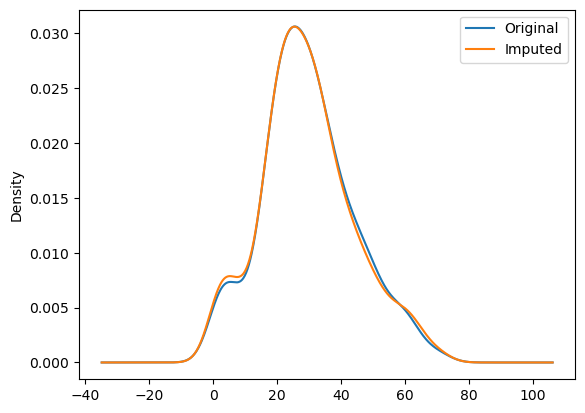

In [16]:
X_train['Age'].plot(kind = 'kde', label = 'Original')
X_train['Age_imputed'].plot(kind = 'kde', label = 'Imputed')

plt.legend()
plt.show()

In [17]:
print('Original variable variance :', X_train['Age'].var())
print('Variance after variable imputation :', X_train['Age_imputed'].var())

Original variable variance : 204.3495133904614
Variance after variable imputation : 211.7634435808086


In [18]:
X_train.cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,58.847836
Age_imputed,204.349513,58.847836,211.763444


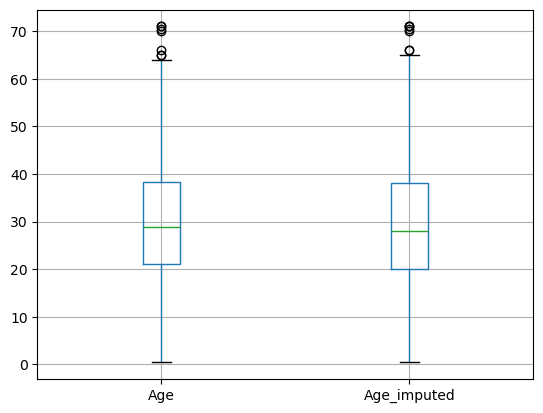

In [19]:
X_train[['Age','Age_imputed']].boxplot()

plt.show()

- ```In production when a user give same vaule of Fare multiple times then he/she will see different age value. Cause, everytime we select the age randomly . It's not good for user exprience. So, we will give the same random value of a constant Fare value: ```

In [21]:
sample_value = X_train["Age"].dropna().sample(1,random_state=int(X_train["Fare"][0]))
sample_value

666    25.0
Name: Age, dtype: float64

## Now for categorical Data: 

In [23]:
data = pd.read_csv('house_prices.csv', usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [24]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [50]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [52]:
X = data
y = data['SalePrice']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [59]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [61]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1388,Gd,TA,377500,TA,Gd
1305,Ex,TA,325000,TA,Ex
677,NaN,Fa,109500,Fa,NaN
83,NaN,TA,126500,TA,NaN
829,NaN,TA,147400,TA,NaN


- ```Filling the missing values```

In [78]:
X_train['GarageQual_imputed'].loc[X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum(),replace = True).values
X_test['GarageQual_imputed'].loc[X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum(),replace = True).values


X_train['FireplaceQu_imputed'].loc[X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum(),replace = True).values
X_test['FireplaceQu_imputed'].loc[X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum(),replace = True).values

/var/folders/k_/w_0ddy056_b8jdbw_w07q8lh0000gn/T/ipykernel_30856/2292467142.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'].loc[X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample

In [82]:
X_train.tail(10)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
433,TA,TA,181000,TA,TA
674,Gd,TA,140000,TA,Gd
1287,NaN,TA,190000,TA,Gd
360,TA,TA,156000,TA,TA
1099,TA,TA,157000,TA,TA
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd
1192,NaN,TA,125000,TA,TA


In [84]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
    axis = 1
)

temp.columns = ['Original','Imputed']

-  **GarageQual Imputation Analysis**  

ধরো, তোমার **GarageQual** ফিচারে কিছু **Missing Value** আছে। এখন আমরা চেক করবো, **ইমপুট করার আগে ও পরে ডেটার অনুপাত কেমন বদলেছে?**  

  **কী করা হয়েছে?**  
1. **আগের ডেটার অনুপাত বের করা হয়েছে** (Missing বাদ দিয়ে)।  
2. **ইমপুট করা ডেটার অনুপাত বের করা হয়েছে** (Missing ভরাট করার পর)।  
3. **দুটো তুলনা করা হয়েছে** একটা **Table** বানিয়ে।  

  **উদ্দেশ্য?**  
ইমপুটেশনের ফলে **ডেটার ডিস্ট্রিবিউশন ঠিক থাকলো কিনা** সেটা দেখা!  


In [92]:
temp

,Original,Imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [94]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.636364
TA,0.412439,0.555556
Fa,0.040917,0.061728
Po,0.027823,0.028058
Ex,0.024550,0.029181


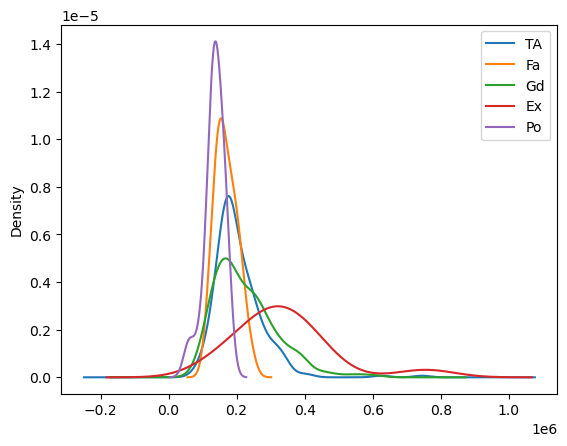

In [112]:
for category in X_train['FireplaceQu'].dropna().unique() :
    X_train[X_train['FireplaceQu']== category]['SalePrice'].plot(kind='kde',label = category)

plt.legend()
plt.show()

- ```Fireplace Quality vs House Price```  

ধরো, বাড়ির **Fireplace (চিমনি) Quality** ভালো হলে দাম বাড়তে পারে, তাই না?  
এই কোডটা **বিভিন্ন Quality-এর Fireplace অনুযায়ী বাড়ির দাম (SalePrice) কেমন হয়** সেটা দেখার জন্য।  

  **কী করা হয়েছে?**  
1. **Fireplace Quality-এর সব ক্যাটাগরি বের করা হয়েছে** (Missing বাদ দিয়ে)।  
2. **প্রতিটা ক্যাটাগরির জন্য** বাড়ির দাম (SalePrice) কেমন সেটা দেখানো হয়েছে।  
3. **গ্রাফ আঁকা হয়েছে**, যাতে দেখা যায় কোন ক্যাটাগরির দাম বেশি, কোনটা কম।  

  **গ্রাফে কী বুঝবো?**  
যদি **Fireplace Quality ভালো হয়**, তাহলে **SalePrice বেশি হওয়ার কথা**।  
এখন **গ্রাফ দেখে বোঝা যাবে**, আসলেই কি Fireplace দাম বাড়ায়?   


In [114]:
for category in X_train['FirePlaceQu_imputed'].dropna().unique() :
    X_train[X_train['FirePlaceQu_imputed'] == category]['SalePrice'].plot(kind = 'kde', label = category)

plt.legend()
plt.show()

KeyError: 'FirePlaceQu_imputed'